## Iris classification

In [1]:
#importing the dataset and loading dataset
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier #importing the ML model to use
from sklearn.model_selection import train_test_split #for spliting the training and test set
import pandas as pd # for data manipulation

In [2]:
#Load data
iris = load_iris()

In [3]:
#converting to panda dataframe and naming column
iris_df = pd.DataFrame(iris['data'], columns = iris['feature_names'])

In [5]:
#attach target to the dataframe
iris_df['Species'] = iris['target']

In [6]:
#let's have a look at how our df looks like
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#let's query the object
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Looking at the entire dataset
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


ValueError: 'virdis' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

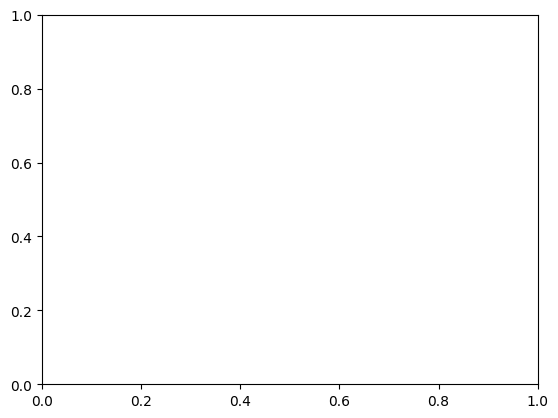

In [24]:
# Visualize the model (plotting)
from matplotlib import pyplot as plt
iris_df.plot(kind='scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', 
            s = 32, alpha = .8, c = iris.target, cmap = 'virdis')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
# spliting train from test data
# spliting automatically sets 75% of the data for training
# spliting is random: for reproducibility, set the random value
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 6)
knn_model = KNeighborsClassifier()

#this creates a shell of the model

In [19]:
#checking train set
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [20]:
# fitting the model (training)
# creating the model
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
#Evaluate the models
print("The accuracy on the test data:", 100 * knn_model.score(x_test, y_test))

The accuracy on the test data: 97.36842105263158


- Accuracy is very important in the healthcare sector so we should be very careful

In [23]:
# Checking whether we have underfitted or overfitted
print("The accuracy on the test data:", 100 * knn_model.score(x_train, y_train))

The accuracy on the test data: 98.21428571428571


### interpretting the accuracy in train and test data
- When the performance on the training data is better than the test data the model is overfitting
- Improve performance by using a different machine learning algorithm, check if any data is missing, etc
- when test data is better than training data - the model is well generalize
- When both performances (training and test data) are poor, then the model is underfitting
- Accuracy cutoff depends on the problem, e.g plant science and human health is different

**How to fine tune to improve accuracy**
- Try a different model
- Check the data to check whether there are measures unrelated to the prediction (disease) and drop them e.g. name of the patient
- Collecting more data

**Downstream**
-After getting the best model, a software engineer can incorporate it into an app, website, tools e.t.c

**Challenges**
- Lack of data
- Form of data not standard